In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

channels = 1
width = 28
height = 28
if K.image_data_format() == 'channels_first':
    input_shape = (channels, width, height)
else:
    input_shape = (width, height, channels)
print("input_shape: {}".format(input_shape))

tmp = list(input_shape)
tmp.insert(0, -1)
dataset_shape = tuple(tmp)
print("dataset_shape: {}".format(dataset_shape))

/Users/chou/.pyenv/versions/anaconda3-5.0.0/envs/post36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


input_shape: (28, 28, 1)
dataset_shape: (-1, 28, 28, 1)


In [2]:
#  准备mnist数据
n_label = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape( dataset_shape).astype('float32') / 255.
X_test = X_test.reshape( dataset_shape).astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, n_label)
Y_test = np_utils.to_categorical(y_test, n_label)

print("X_train: {}".format(X_train.shape))
print("Y_train: {}".format(Y_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
Y_test: (10000, 10)


label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


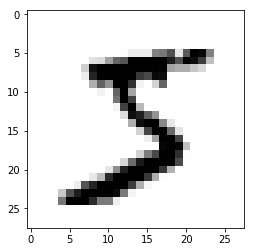

In [3]:
#  显示第一个图片数据
i = 0
plt.imshow(X_train[i,:,:,0], interpolation="nearest", cmap=cm.binary)
print("label: {}".format(Y_train[i]))

In [4]:
# 构建一个简单的CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_label, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [5]:
# 学习
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 278us/step - loss: 0.3345 - acc: 0.8981 - val_loss: 0.0875 - val_acc: 0.9751
Epoch 2/10
48000/48000 [==============================] - 12s 249us/step - loss: 0.1403 - acc: 0.9583 - val_loss: 0.0650 - val_acc: 0.9808
Epoch 3/10
48000/48000 [==============================] - 12s 248us/step - loss: 0.1060 - acc: 0.9670 - val_loss: 0.0552 - val_acc: 0.9827
Epoch 4/10
48000/48000 [==============================] - 12s 251us/step - loss: 0.0886 - acc: 0.9729 - val_loss: 0.0490 - val_acc: 0.9850
Epoch 5/10
48000/48000 [==============================] - 12s 248us/step - loss: 0.0785 - acc: 0.9760 - val_loss: 0.0454 - val_acc: 0.9858
Epoch 6/10
48000/48000 [==============================] - 12s 254us/step - loss: 0.0693 - acc: 0.9787 - val_loss: 0.0445 - val_acc: 0.9865
Epoch 7/10
48000/48000 [==============================] - 12s 252us/step - loss: 0.0617 - acc: 0.9805 - val_loss: 0.

In [6]:
vs = model.evaluate(X_test, Y_test)
print("Test classification rate {}".format(vs[1]))

10000/10000 [==============================] - 1s 74us/step
Test classification rate 0.9884


In [7]:
# 正误表
y_pred=model.predict_classes(X_test)
# row: y_pred col: y_test
pd.crosstab(y_pred, y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,1,0,0,2,4,0,2,4
1,1,1132,2,0,1,0,3,1,1,3
2,1,1,1024,3,0,0,0,5,3,0
3,1,1,0,998,0,5,0,2,1,5
4,0,0,1,0,972,0,1,0,0,7
5,0,0,0,5,0,883,3,1,3,6
6,1,0,0,0,5,2,946,0,0,0
7,0,1,3,2,0,0,0,1015,2,4
8,1,0,1,2,2,0,1,2,961,2


In [8]:
# blue: y_test red: y_pred
test_wrong = [im for im in zip(X_test, y_pred, y_test) if im[1] != im[2]]
print("wrong num: {}".format(len(test_wrong)))

wrong num: 116


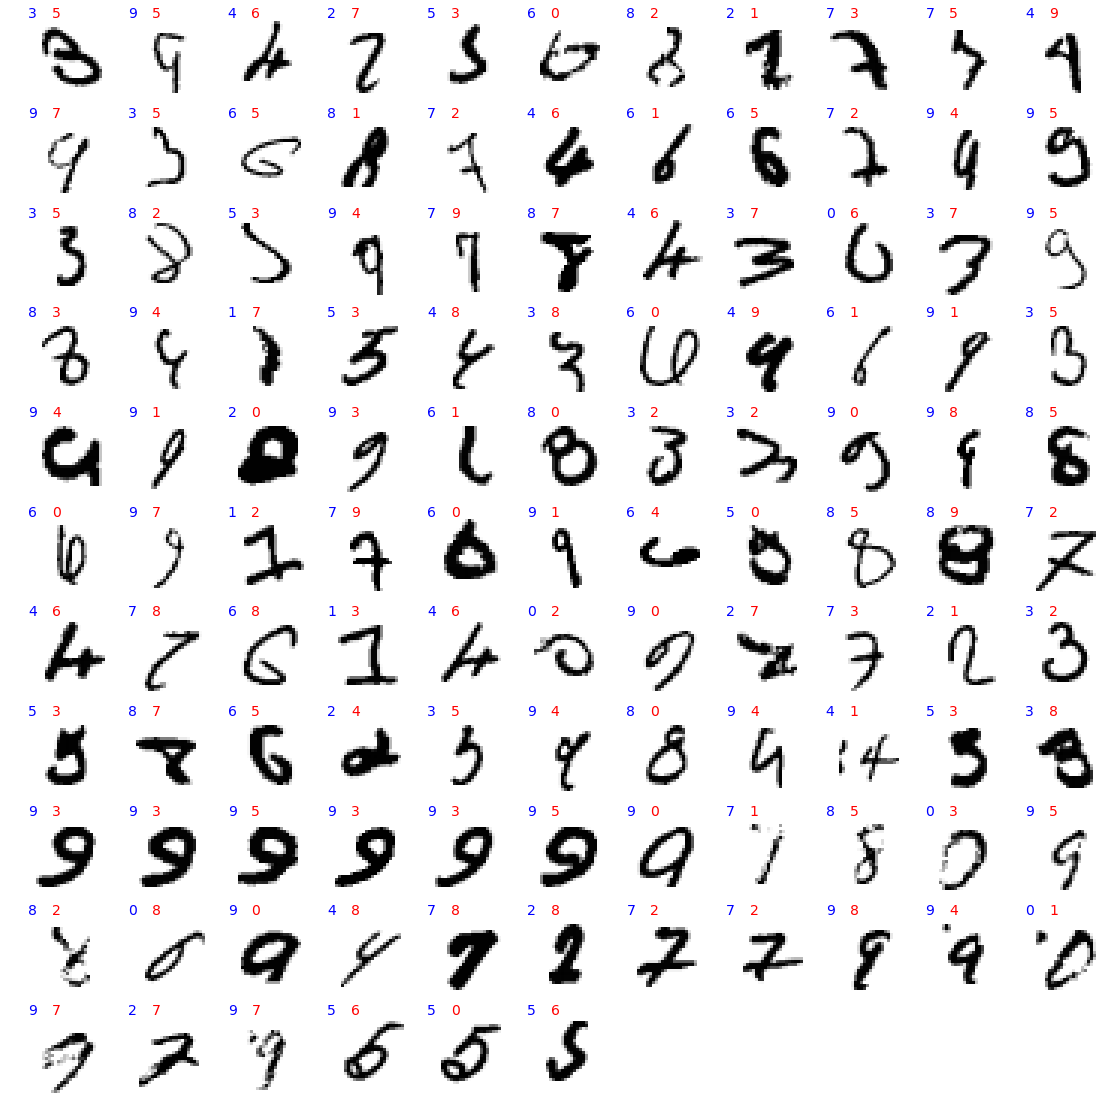

In [9]:
plt.figure(figsize=(15, 15))
for ind, val in enumerate(test_wrong):
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.subplot(11, 11, ind+1)
    im = 1- val[0][:,:,0]
    plt.axis("off")
    plt.imshow(im, cmap='gray')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.text(0, 0, val[2], fontsize=14, color='blue')

In [10]:
# Filter的可视化
layers = model.layers
# first layer
w1 = layers[0].get_weights()[0]
b1 = layers[0].get_weights()[1]
print("Layer 1: weight {} bias {}".format(w1.shape, b1.shape))

Layer 1: weight (5, 5, 1, 16) bias (16,)


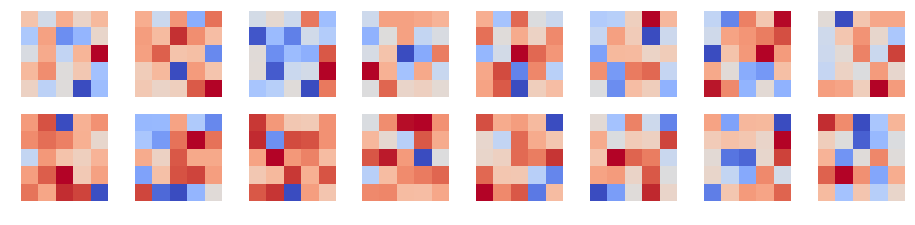

In [11]:
w1 = w1.reshape(16, 5, 5, 1)
plt.figure(figsize=(16, 3.5))
for ind, val in enumerate(w1):
    plt.subplot(2, 8, ind+1)
    im = val.reshape((5, 5))
    plt.axis("off")
    plt.imshow(im, cmap='coolwarm', interpolation='nearest')

In [12]:
# 中间层可视化
# 获取判断正确／不正确的图片
def get_imgs(num, flg_correct=True):
    if flg_correct:
        mask = (y_test == num) & (y_pred == y_test)
    else:
        mask = (y_test == num) & (y_pred != y_test)
    return X_test[mask], y_pred[mask]

In [13]:
layer1 = model.layers.copy()[0]
print(model.layers.copy()[1])
# model2
model2 = Sequential()
model2.add(layer1)
model2.compile(loss='categorical_crossentropy', optimizer='RMSprop') # 只是编译，实际上loss 和 optimizer都是没用到的

ValueError: Colormap coolWarm is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

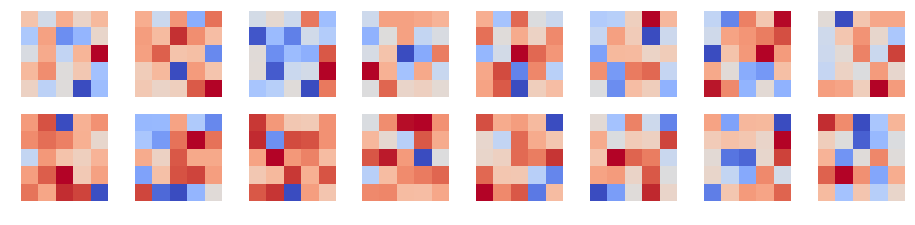

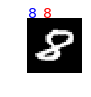

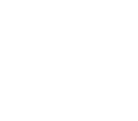

In [14]:
num = 8 #要显示的数字
m = 2 # 要显示的图片数量

w1 = model2.layers[0].get_weights()[0]
w1 = w1.reshape(16, 5, 5, 1)
plt.figure(figsize=(16, 3.5))
for i, val in enumerate(w1):
    plt.subplot(2, 8, i+1)
    im = val.reshape((5,5))
    plt.axis("off")
    plt.imshow(im, cmap='coolwarm', interpolation='nearest')

xs_correct, nums_correct = get_imgs(num, flg_correct=True)
xs_wrong, nums_wrong = get_imgs(num, flg_correct=False)
xs = np.concatenate([xs_correct[:m], xs_wrong[:m]])

ys = np.concatenate([nums_correct[:m], nums_wrong[:m]])

imgs_f = model2.predict(xs)
for x, num_pred, img_f in zip(xs, ys, imgs_f):
    plt.figure(figsize=(1,1))
    plt.axis('off')
    # print("x {}, img_f {}".format(x.shape, img_f.shape))
    plt.imshow(x[:,:,0], cmap='gray', interpolation='nearest')
    plt.text(0, -1, num, fontsize=14, color='blue')
    plt.text(8, -1, num_pred, fontsize=14, color='red')
    plt.figure(figsize=(16, 3.5))
    img_f = img_f.reshape(16,24,24)
    for i, img in enumerate(img_f):
        plt.subplot(2, 8, i+1)
        plt.axis('off')
        plt.imshow(img, cmap='coolWarm', interpolation='nearest')